In [1]:
import numpy as np
import pandas as pd
import glob
import os

In [ ]:
mash_tabpath = "/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0001.txt" #"\\10.22.140.220\pmata\pruebas_tests\distance_matrix\mash\mash_lmo0001.txt"
blast_tabpath = "/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0001_db.csv" #r"\\10.22.140.220\pmata\pruebas_tests\distance_matrix\blast\pident_matrix_lmo0001_db.csv"

In [171]:
def fill_triangle_matrix(mash_tabpath):
    with open(mash_tabpath, "r") as file:
        mashvals = [list(map(float, line.split())) for line in file]

    matrix_size = len(mashvals)
    matrix_shape = (matrix_size, matrix_size)

    # Create an empty array of zeros with the determined shape
    zero_mat = np.zeros(matrix_shape)

    for i in range(matrix_size):
        for j in range(i + 1):  # Only fill values up to the diagonal
            mashvals[i][j] = mashvals[i][j]
    full_mashtab = mashvals
    tri_mashtable = pd.DataFrame(full_mashtab).fillna(0)
    tri_mashtable_clean = tri_mashtable.drop(tri_mashtable.columns[0], axis=1)
    tri_mashtable_clean[tri_mashtable_clean.columns[-1]+1] = float(0)
    tri_masharray = tri_mashtable_clean.values
    masharray_transraw = tri_masharray.T
    masharray_clean = np.nan_to_num(masharray_transraw, nan=0.0)
    masharray_full = tri_masharray + masharray_transraw - np.diag(np.diag(masharray_clean))
    return masharray_full

In [157]:
masharray_full = fill_triangle_matrix(mash_tabpath)
pd.DataFrame(masharray_full)

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
0,0.000000,0.020214,0.002244,0.021155,0.016499,0.002912,0.020148,0.004864,0.004087,0.002969,...,0.001496,0.003141,0.003083,0.021639,0.020214,0.082949,0.003846,0.000681,0.021639,0.021223
1,0.020214,0.000000,0.017772,0.002519,0.008308,0.021155,0.000806,0.016954,0.016725,0.018805,...,0.019118,0.017712,0.018867,0.001496,0.000706,0.074432,0.019951,0.021361,0.000781,0.001601
2,0.002244,0.017772,0.000000,0.018867,0.014201,0.002216,0.017712,0.002464,0.004864,0.000706,...,0.003876,0.000831,0.000856,0.019499,0.017772,0.079901,0.001496,0.002998,0.018992,0.018681
3,0.021155,0.002519,0.018867,0.000000,0.009326,0.021991,0.001653,0.018192,0.017653,0.020017,...,0.019886,0.018805,0.020148,0.003227,0.003256,0.072652,0.021155,0.022205,0.003314,0.002491
4,0.016499,0.008308,0.014201,0.009326,0.000000,0.016954,0.007341,0.013551,0.012076,0.015187,...,0.014405,0.014150,0.015347,0.009773,0.009166,0.064825,0.014303,0.016839,0.009286,0.008232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.082949,0.074432,0.079901,0.072652,0.064825,0.080748,0.071963,0.078259,0.080322,0.079901,...,0.082499,0.079901,0.079901,0.077463,0.078259,0.000000,0.082054,0.082949,0.070292,0.071963
581,0.003846,0.019951,0.001496,0.021155,0.014303,0.003490,0.019886,0.004057,0.006559,0.002216,...,0.005576,0.002408,0.002381,0.021920,0.019951,0.082054,0.000000,0.004611,0.021292,0.020814
582,0.000681,0.021361,0.002998,0.022205,0.016839,0.003667,0.021361,0.005642,0.004800,0.003697,...,0.002244,0.003846,0.003846,0.022857,0.021361,0.082949,0.004611,0.000000,0.022784,0.022277
583,0.021639,0.000781,0.018992,0.003314,0.009286,0.022420,0.001627,0.018313,0.018071,0.020148,...,0.020412,0.018930,0.020214,0.002271,0.001522,0.070292,0.021292,0.022784,0.000000,0.002408


In [150]:
def take_upper_tri_and_dup(full_dist_matrix):
    upper_triangle_matrix = np.triu(full_dist_matrix)
    full_matrix = upper_triangle_matrix + upper_triangle_matrix.T - np.diag(np.diag(upper_triangle_matrix))
    return full_matrix

In [8]:
blast_paths = sorted(glob.glob("/home/pmata/pruebas_tests/distance_matrix/blast/*.csv"))
mash_paths = sorted(glob.glob("/home/pmata/pruebas_tests/distance_matrix/mash/mash*.txt"))
print({x:y for x,y in zip(blast_paths, mash_paths)})

{'/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0001_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0001.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0002_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0002.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0003_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0003.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0004_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0004.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0005_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0005.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0006_db.csv': '/home/pmata/pruebas_tests/distance_matrix/mash/mash_lmo0006.txt', '/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0007_db.csv': '/home/pmata/pruebas_tests/distance_m

In [195]:
from difflib import SequenceMatcher
match = SequenceMatcher(None, "pident_matrix_lmo0001_db.csv", "mash_lmo0001_db.txt").find_longest_match()
print("pident_matrix_lmo0001_db.csv"[match.a:match.a + match.size])

_lmo0001_db.


In [270]:
import mantel
import scipy
from difflib import SequenceMatcher

def mantel_tester(blast_paths, mash_paths, pval=0.01):
    mantel_summary = {}
    failed_tabs = []
    for blast_tabpath, mash_tabpath in zip(blast_paths, mash_paths):
        blast_filename = os.path.basename(blast_tabpath)
        mash_filename = os.path.basename(mash_tabpath)
        match = SequenceMatcher(None, blast_filename, mash_filename).find_longest_match()
        common_name = blast_filename[match.a:match.a + match.size].strip(".")

        blastable = pd.read_csv(blast_tabpath)
        blastarray = blastable.drop(blastable.columns[0], axis=1).to_numpy()
        mirror_blastarray = take_upper_tri_and_dup(blastarray)
        inverted_blast = 100-mirror_blastarray

        masharray_full = fill_triangle_matrix(mash_tabpath)

        condensed_mash = scipy.spatial.distance.squareform(masharray_full, force="tovector", checks=True)
        try:
            condensed_blast = scipy.spatial.distance.squareform(inverted_blast, force="tovector", checks=True)
        except ValueError:
            print(f"{blast_tabpath} is not symmetric, skipped")
            failed_tabs.append(blast_tabpath)
            continue
        permutations = int(1/pval)
        result = mantel.test(condensed_mash, condensed_blast, perms=permutations, method="pearson")
        print(f"Results from mantel test between {blast_filename} and {mash_filename}:", 
            f"veridical-correlation = {result.r} | p-value = {result.p}")
        mantel_summary[common_name] = {"veridical_correlation": result.r, "p_value": result.p, "z_score": result.z}
    print(f"{len(failed_tabs)} blast matrixes where non-symmetrical: {failed_tabs}")
    return mantel_summary

In [271]:
blast_paths = sorted(glob.glob("/home/pmata/pruebas_tests/distance_matrix/blast/*.csv"))
mash_paths = sorted(glob.glob("/home/pmata/pruebas_tests/distance_matrix/mash/mash*.txt"))
mantel_summary = mantel_tester(blast_paths, mash_paths, pval=0.01)

Results from mantel test between pident_matrix_lmo0001_db.csv and mash_lmo0001.txt: veridical-correlation = 0.9944607850255069 | p-value = 0.01
Results from mantel test between pident_matrix_lmo0002_db.csv and mash_lmo0002.txt: veridical-correlation = 0.9917758624883196 | p-value = 0.01
/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0003_db.csv is not symmetric, skipped
Results from mantel test between pident_matrix_lmo0004_db.csv and mash_lmo0004.txt: veridical-correlation = 0.9202667486313154 | p-value = 0.01
Results from mantel test between pident_matrix_lmo0005_db.csv and mash_lmo0005.txt: veridical-correlation = 0.9904021882149964 | p-value = 0.01
Results from mantel test between pident_matrix_lmo0006_db.csv and mash_lmo0006.txt: veridical-correlation = 0.9921881250066177 | p-value = 0.01
Results from mantel test between pident_matrix_lmo0007_db.csv and mash_lmo0007.txt: veridical-correlation = 0.9914636217538014 | p-value = 0.01
Results from mantel test between 

In [272]:
import json
with open("mantel_test_pval001.json", "w") as f:
    json.dump(mantel_summary, f)

In [273]:
with open("mantel_test_pval001.json", "r") as f:
    mantel_pval001 = json.load(f)

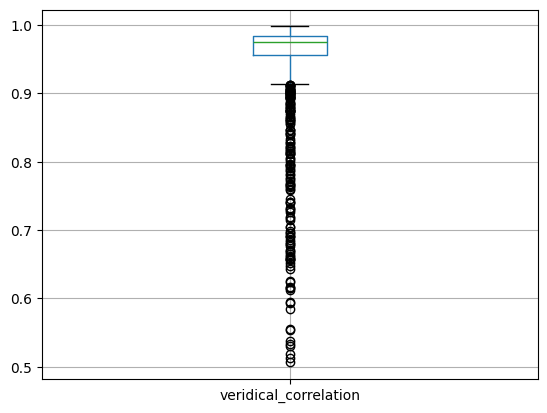

In [275]:
import matplotlib.pyplot as plt

mantel_df_pval001 = pd.DataFrame.from_dict(mantel_pval001)
mantel_df_pval001_tr = mantel_df_pval001.T
mantel_df_pval001_tr.boxplot(column=["veridical_correlation"], return_type="axes")
plt.show()

In [280]:
def get_df_outliers(mantel_df, column):
    q1 = mantel_df[column].quantile(0.25)
    q3 = mantel_df[column].quantile(0.75)
    iqr = q3 - q1

    outliers = (mantel_df[column] < (q1 - 1.5 * iqr)) | (mantel_df[column] > (q3 + 1.5 * iqr))
    outliers_df = mantel_df[outliers]
    return outliers_df, outliers.sum()

In [283]:
outliers_df = get_df_outliers(mantel_df_pval001_tr, "veridical_correlation")[0]

In [290]:
len(outliers_df[outliers_df["veridical_correlation"] < 0.90])

137

# More tests (not relevant)

In [218]:
with open ("mantel_test_part2.json", "r") as f:
    contentjson2 = json.load(f)
with open ("mantel_test_part1.json", "r") as f:
    contentjson1 = json.load(f)

In [219]:
merged_mantel_dicts = contentjson1 | contentjson2

In [227]:
merged_mantel_dicts["_lmo2854"]

{'veridical_correlation': 0.9629433230504976,
 'p_value': 0.0001,
 'z_score': 37.26985950504366}

In [228]:
dict(sorted(merged_mantel_dicts.items()))
import pandas as pd

mantel_df = pd.DataFrame.from_dict(merged_mantel_dicts)

In [257]:
mantel_df_transp = mantel_df.T

In [258]:
mantel_df_transp

,veridical_correlation,p_value,z_score
_lmo0001,0.994461,0.0001,29.314388
_lmo0002,0.991776,0.0001,39.949286
_lmo0004,0.920267,0.0001,12.597377
_lmo0005,0.990402,0.0001,35.187808
_lmo0006,0.992188,0.0001,39.453992
...,...,...,...
_lmo2840,0.983187,0.0001,36.689192
_lmo2842,0.952305,0.0001,54.484262
_lmo2853,0.981415,0.0001,22.089173
_lmo2854,0.962943,0.0001,37.269860


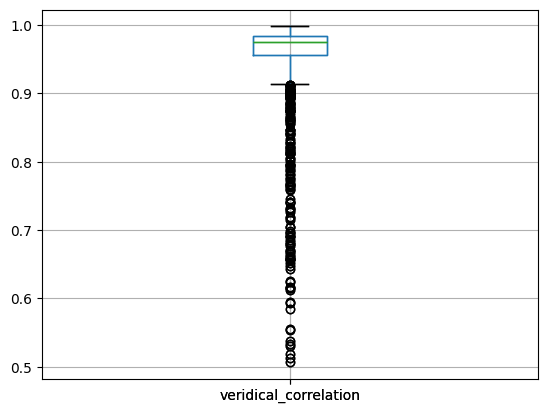

In [251]:
import matplotlib.pyplot as plt
mantel_df_transp.boxplot(column=["veridical_correlation"], return_type="axes")
plt.show()

In [ ]:
get_df_outliers(mantel)

In [264]:
156/len(mantel_df_transp)

0.10222804718217562

In [208]:
with open ("mantel_test_part1.json", "r") as f:
    mantelsum = json.load(f)
mantelsum

{'_lmo0001': {'veridical_correlation': 0.9944607850255069,
  'p_value': 0.0001,
  'z_score': 29.314387624554765},
 '_lmo0002': {'veridical_correlation': 0.9917758624883196,
  'p_value': 0.0001,
  'z_score': 39.94928556566074},
 '_lmo0004': {'veridical_correlation': 0.9202667486313154,
  'p_value': 0.0001,
  'z_score': 12.597377429477175},
 '_lmo0005': {'veridical_correlation': 0.9904021882149964,
  'p_value': 0.0001,
  'z_score': 35.18780806865771},
 '_lmo0006': {'veridical_correlation': 0.9921881250066177,
  'p_value': 0.0001,
  'z_score': 39.45399198925322},
 '_lmo0007': {'veridical_correlation': 0.9914636217538014,
  'p_value': 0.0001,
  'z_score': 76.88836639605961},
 '_lmo0008': {'veridical_correlation': 0.9819273199401419,
  'p_value': 0.0001,
  'z_score': 94.34539461114989},
 '_lmo0009': {'veridical_correlation': 0.956538676580417,
  'p_value': 0.0001,
  'z_score': 31.236892351420344},
 '_lmo0012': {'veridical_correlation': 0.9768251847184299,
  'p_value': 0.0001,
  'z_score': 4

In [142]:
def check_nonsym_pairs(table_path):
    blastable = pd.read_csv(table_path, sep=",")
    blastable_clean = blastable.drop(blastable.columns[0], axis=1)
    blastarray_full = blastable_clean.to_numpy()
    # Distance matrix should be symmetrical, this line gets the number of non-symmetrical pairs
    non_sym_pairs = len(blastarray_full[np.where(np.abs(blastarray_full-blastarray_full.T) != 0)])/2
    return non_sym_pairs

all_paths = glob.glob("/home/pmata/pruebas_tests/distance_matrix/blast/*.csv")
sym_blastmats = []
for path in all_paths:
    non_sym_pairs = check_nonsym_pairs(path)
    print(f"Non symmetrical pairs for locus {os.path.basename(path)}: {non_sym_pairs}")
    if non_sym_pairs == 0:
        sym_blastmats.append(path)


Non symmetrical pairs for locus pident_matrix_lmo0202_db.csv: 3.0
Non symmetrical pairs for locus pident_matrix_lmo0284_db.csv: 7.0
Non symmetrical pairs for locus pident_matrix_lmo0152_db.csv: 202.0
Non symmetrical pairs for locus pident_matrix_lmo0343_db.csv: 13.0
Non symmetrical pairs for locus pident_matrix_lmo0387_db.csv: 15.0
Non symmetrical pairs for locus pident_matrix_lmo0289_db.csv: 880.0
Non symmetrical pairs for locus pident_matrix_lmo0232_db.csv: 2914.0
Non symmetrical pairs for locus pident_matrix_lmo0097_db.csv: 287.0
Non symmetrical pairs for locus pident_matrix_lmo0454_db.csv: 722.0
Non symmetrical pairs for locus pident_matrix_lmo0455_db.csv: 18547.0
Non symmetrical pairs for locus pident_matrix_lmo0206_db.csv: 1.0
Non symmetrical pairs for locus pident_matrix_lmo0293_db.csv: 725.0
Non symmetrical pairs for locus pident_matrix_lmo0046_db.csv: 266.0
Non symmetrical pairs for locus pident_matrix_lmo0374_db.csv: 28.0
Non symmetrical pairs for locus pident_matrix_lmo0153_

In [132]:
table_path = "/home/pmata/pruebas_tests/distance_matrix/blast/pident_matrix_lmo0033_db.csv"
blastable = pd.read_csv(table_path, sep=",")
blastable_clean = blastable.drop(blastable.columns[0], axis=1)
blastarray_full = blastable_clean.to_numpy()
blastarray_full[np.where(np.abs(blastarray_full-blastarray_full.T) != 0)]
print(np.where(np.abs(blastarray_full-blastarray_full.T) != 0))

(array([   1,    1,    1, ..., 1308, 1308, 1308]), array([   4,   10,   18, ..., 1103, 1139, 1259]))


In [120]:
print(len(blastarray_full[np.where(np.abs(blastarray_full-blastarray_full.T) != 0)])/2)
print(np.where(np.abs(blastarray_full-blastarray_full.T) != 0))

3.0
(array([ 48, 111, 180, 180, 180, 554]), array([180, 180,  48, 111, 554, 180]))
